In [0]:
%matplotlib inline




# Markov Transition Field


A Markov Transition Field is an image obtained from a time series, representing
a field of transition probabilities for a discretized time series. Different
strategies can be used to bin time series. his example illustrates the
transformation on the first sample of the *GunPoint* dataset.
It is implemented as :class:`pyts.image.MarkovTransitionField`.


In [2]:
! pip install pyts


     |████████████████████████████████| 2.5MB 2.8MB/s 
     |████████████████████████████████| 2.5MB 43.0MB/s 
  Found existing installation: numba 0.47.0
    Uninstalling numba-0.47.0:
      Successfully uninstalled numba-0.47.0


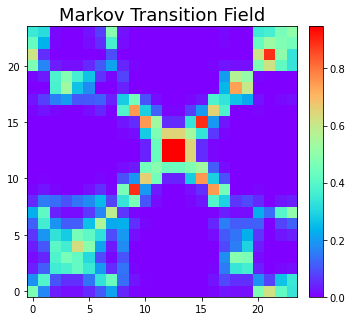

In [3]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField
from pyts.datasets import load_gunpoint

X, _, _, _ = load_gunpoint(return_X_y=True)

# MTF transformation
mtf = MarkovTransitionField(image_size=24)
X_mtf = mtf.fit_transform(X)

# Show the image for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_mtf[0], cmap='rainbow', origin='lower')
plt.title('Markov Transition Field', fontsize=18)
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()

In [7]:
X.shape

(50, 150)

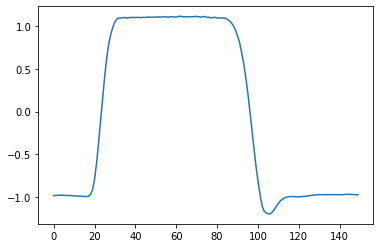

In [37]:
plt.plot(X[32,:])

In [12]:
X[18,:].shape

(150,)

In [0]:
y = [i for i in range(0,40,1)]+ [40 for i in range(40, 75)]+ [i for i in range(75,0,-1)]

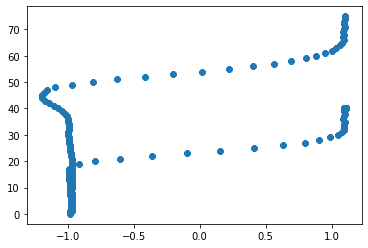

In [38]:
plt.plot(X[32,:],y,'8')

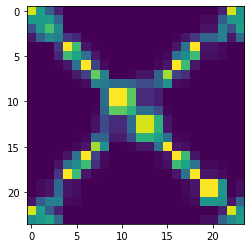

In [42]:
plt.imshow(X_mtf[43])

In [72]:
X_mtf.shape

(50, 24, 24)

In [0]:
def Markov_matrix_generator(bins, data, normal = True):
  data = np.array(data)
  b0 = bin_finder(bins, data[0])
  W = np.zeros((len(bins), len(bins)))
  for item in range(1,len(data)):
    b1 = bin_finder(bins, data[item])
    W[b0,b1]+=1
    b0 = b1

  if normal == True:
    W = W / (W.sum(axis=1, keepdims = True) + 0.000001)  # This will normalize the W in which the transition probability in each row will sum to 1
    return W

  return W



In [0]:
def bin_finder(bins, n):
  '''
  for example:
    suppose that out bins is like this [1,3,5,7,9]

    so this function will return the following values for 1.5, 3.45, 1, 5

    1.5  ----> 0
    3.45 ----> 1
    1    ----> 0
    5    ----> 2
  '''
  eps = 0.0001
  d = bins[2] - bins[1]
  n+=eps
  return np.argmax((n>bins) * ((n-d)<bins))

In [0]:
def bin_creator(data, n):
  max_ = data.max()
  min_ = data.min()
  bins = np.linspace(np.ceil(min_)-1,np.floor(max_),n)
  return bins


In [0]:
import numpy as np

In [0]:
t = np.linspace(0,15,1000)
x = np.sin(t) + np.sin(2*t) + 4*np.sin(5*t) + 2*np.random.randn(len(t))

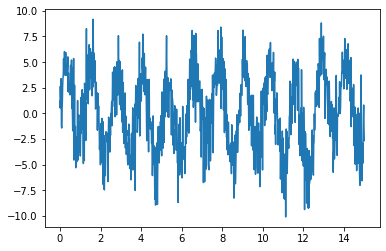

In [59]:
plt.plot(t,x)

In [60]:
bins = bin_creator(x, 100)
bins

array([-11.        , -10.7979798 , -10.5959596 , -10.39393939,
       -10.19191919,  -9.98989899,  -9.78787879,  -9.58585859,
        -9.38383838,  -9.18181818,  -8.97979798,  -8.77777778,
        -8.57575758,  -8.37373737,  -8.17171717,  -7.96969697,
        -7.76767677,  -7.56565657,  -7.36363636,  -7.16161616,
        -6.95959596,  -6.75757576,  -6.55555556,  -6.35353535,
        -6.15151515,  -5.94949495,  -5.74747475,  -5.54545455,
        -5.34343434,  -5.14141414,  -4.93939394,  -4.73737374,
        -4.53535354,  -4.33333333,  -4.13131313,  -3.92929293,
        -3.72727273,  -3.52525253,  -3.32323232,  -3.12121212,
        -2.91919192,  -2.71717172,  -2.51515152,  -2.31313131,
        -2.11111111,  -1.90909091,  -1.70707071,  -1.50505051,
        -1.3030303 ,  -1.1010101 ,  -0.8989899 ,  -0.6969697 ,
        -0.49494949,  -0.29292929,  -0.09090909,   0.11111111,
         0.31313131,   0.51515152,   0.71717172,   0.91919192,
         1.12121212,   1.32323232,   1.52525253,   1.72

In [0]:
mat_normal = Markov_matrix_generator(bins, x, normal = True)

In [0]:
mat = Markov_matrix_generator(bins, x, normal=False) 

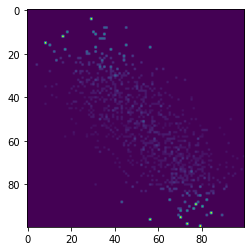

In [63]:
plt.imshow(mat_normal)

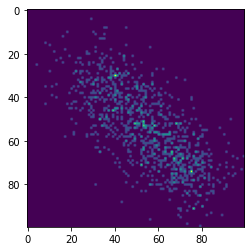

In [64]:
plt.imshow(mat)

In [0]:
mtf = MarkovTransitionField(image_size= 8)
result = mtf.fit_transform([x])

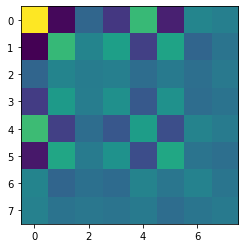

In [71]:
plt.imshow(result[0])